https://www.machinehack.com/course/predict-the-flight-ticket-price-hackathon/

## Predict The Flight Ticket Price Hackathon

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
total_df=train_df.append(test_df,sort=False)

In [7]:
total_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
total_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

### In Linear Regression the target variable must be normally distributed:

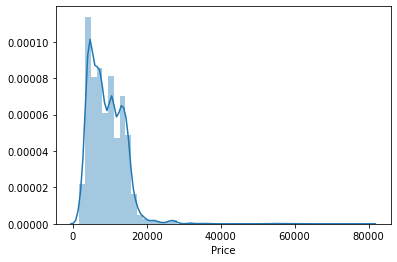

In [9]:
sns.distplot(train_df['Price'])

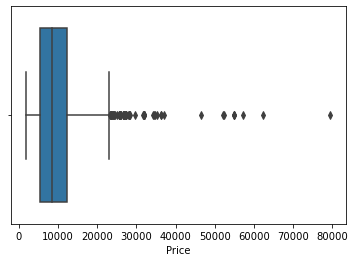

In [10]:
sns.boxplot(train_df['Price'])

In [11]:
IQR=train_df.Price.quantile(0.75)-train_df.Price.quantile(0.25)

In [12]:
## we are removing the extreme outliers in this case

In [13]:
lower_bridge=train_df['Price'].quantile(0.25)-(IQR*3)
upper_bridge=train_df['Price'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-16011.0
33661.0


(None, None)

In [14]:
len(train_df[train_df['Price']>33661])

16

In [15]:
train_df = train_df.drop(np.where(train_df['Price']>33661)[0] , axis= 0)

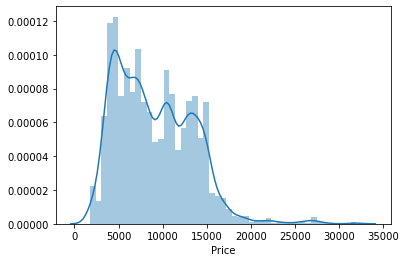

In [16]:
sns.distplot(train_df['Price'])

In [17]:
## even after removing outliers the distribution of the data has not changed

In [18]:
## will try log_transformation or Exponential Transformation or reciprocal transformation

In [19]:
train_df['Price_exponential']=train_df.Price**(1/1.2)

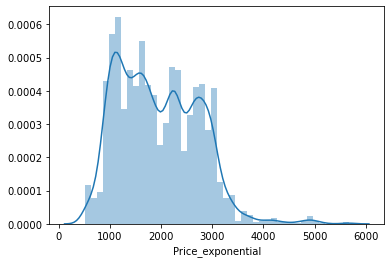

In [20]:
sns.distplot(train_df['Price_exponential'])

In [21]:
train_df['Price_reciprocal']=1/train_df.Price

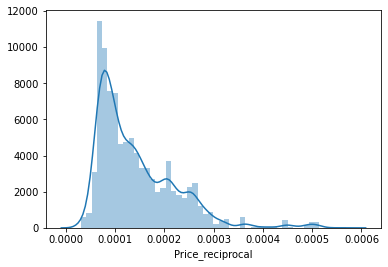

In [22]:
sns.distplot(train_df['Price_reciprocal'])

In [23]:
train_df['Price_log'] =np.log(train_df['Price'])

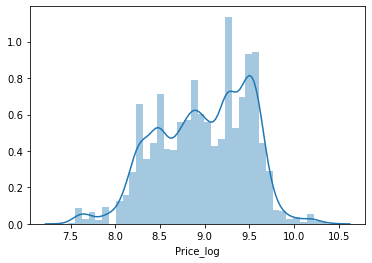

In [24]:
sns.distplot(train_df['Price_log'])

## even after transformation it doesn't follow normal distribution
## if sample size greater than 3000 then the normal distribution assumption for the target variable can be violated

In [25]:
train_df = train_df.drop(['Price_exponential', 'Price_reciprocal','Price_log'], axis =1)

# EDA

In [26]:
## correlation plot

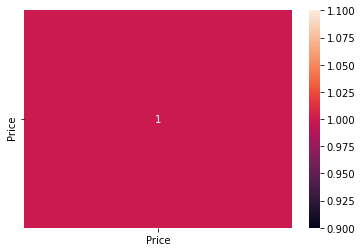

In [27]:
sns.heatmap(train_df.corr() , annot = True )

In [28]:
### here only the price variable is numerical 

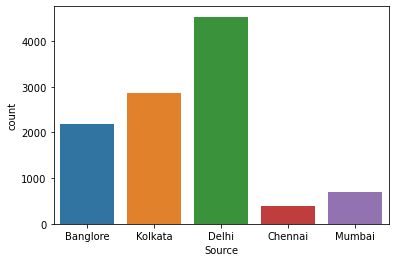

In [29]:
sns.countplot(x='Source' , data =train_df)

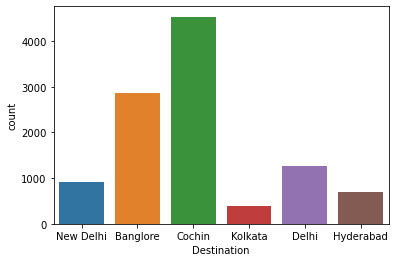

In [30]:
sns.countplot(x='Destination' , data =train_df)

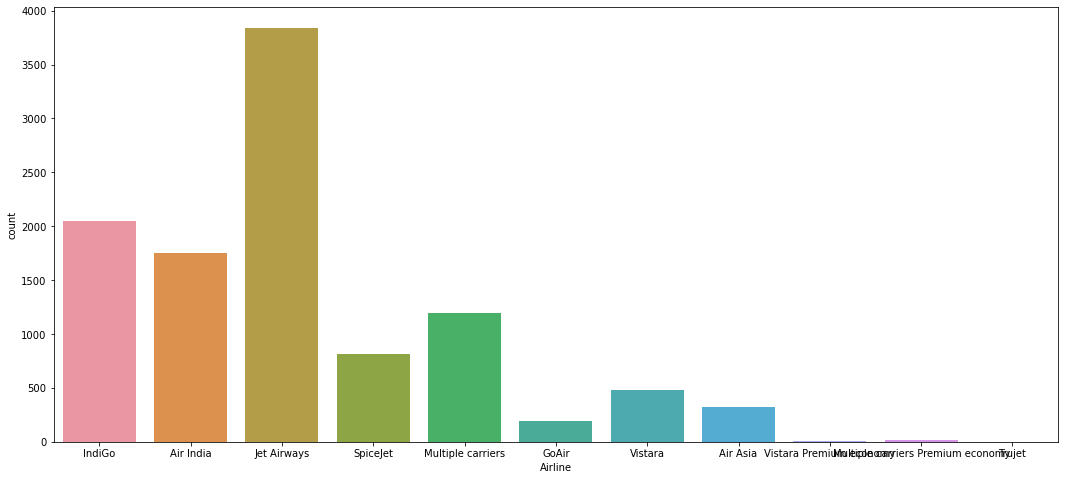

In [31]:
plt.figure(figsize= (18,8))
sns.countplot(x='Airline' , data =train_df)

## Feature Engineering 

In [32]:
total_df['Date']=total_df['Date_of_Journey'].str.split('/').str[0]
total_df['Month']=total_df['Date_of_Journey'].str.split('/').str[1]
total_df['Year']=total_df['Date_of_Journey'].str.split('/').str[2]

In [33]:
total_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [34]:
total_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [35]:
total_df['Date']=total_df['Date'].astype(int)
total_df['Month']=total_df['Month'].astype(int)
total_df['Year']=total_df['Year'].astype(int)

In [36]:
total_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [37]:
total_df=total_df.drop(['Date_of_Journey'],axis=1)

In [38]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [39]:
total_df['Arrival_Time']=total_df['Arrival_Time'].str.split(' ').str[0]

In [40]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [41]:
total_df[total_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [42]:
total_df['Total_Stops']=total_df['Total_Stops'].fillna('1 stop')

In [43]:
total_df['Total_Stops']=total_df['Total_Stops'].replace('non-stop','0 stop')

In [44]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [45]:
total_df['Stop'] = total_df['Total_Stops'].str.split(' ').str[0]

In [46]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [47]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stop                object
dtype: object

In [48]:
total_df['Stop']=total_df['Stop'].astype(int)
total_df=total_df.drop(['Total_Stops'],axis=1)

In [49]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [50]:
total_df['Arrival_Hour'] = total_df['Arrival_Time'] .str.split(':').str[0]
total_df['Arrival_Minute'] = total_df['Arrival_Time'] .str.split(':').str[1]

In [51]:
total_df['Arrival_Hour']     =  total_df['Arrival_Hour'].astype(int)
total_df['Arrival_Minute']   =  total_df['Arrival_Minute'].astype(int)
total_df                     =  total_df.drop(['Arrival_Time'],axis=1)

In [52]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [53]:
total_df['Departure_Hour'] = total_df['Dep_Time'] .str.split(':').str[0]
total_df['Departure_Minute'] = total_df['Dep_Time'] .str.split(':').str[1]

In [54]:
total_df['Departure_Hour']=total_df['Departure_Hour'].astype(int)
total_df['Departure_Minute']=total_df['Departure_Minute'].astype(int)
total_df=total_df.drop(['Dep_Time'],axis=1)

In [55]:
total_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [56]:
total_df['Route_1'] = total_df['Route'].str.split('→ ').str[0]
total_df['Route_2'] = total_df['Route'].str.split('→ ').str[1]
total_df['Route_3'] = total_df['Route'].str.split('→ ').str[2]
total_df['Route_4'] = total_df['Route'].str.split('→ ').str[3]
total_df['Route_5'] = total_df['Route'].str.split('→ ').str[4]

In [57]:
total_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [58]:
total_df['Price'].fillna((total_df['Price'].mean()),inplace=True)

In [59]:
total_df['Route_1'].fillna("None",inplace=True)
total_df['Route_2'].fillna("None",inplace=True)
total_df['Route_3'].fillna("None",inplace=True)
total_df['Route_4'].fillna("None",inplace=True)
total_df['Route_5'].fillna("None",inplace=True)

In [60]:
total_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [61]:
total_df=total_df.drop(['Route'],axis=1)
total_df=total_df.drop(['Duration'],axis=1)

In [62]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [63]:
total_df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
total_df["Airline"]=encoder.fit_transform(total_df['Airline'])
total_df["Source"]=encoder.fit_transform(total_df['Source'])
total_df["Destination"]=encoder.fit_transform(total_df['Destination'])
total_df["Additional_Info"]=encoder.fit_transform(total_df['Additional_Info'])
total_df["Route_1"]=encoder.fit_transform(total_df['Route_1'])
total_df["Route_2"]=encoder.fit_transform(total_df['Route_2'])
total_df["Route_3"]=encoder.fit_transform(total_df['Route_3'])
total_df["Route_4"]=encoder.fit_transform(total_df['Route_4'])
total_df["Route_5"]=encoder.fit_transform(total_df['Route_5'])

In [65]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


## Feature Selection

In [66]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [67]:
df_train=total_df[0:10683]
df_test=total_df[10683:]

In [68]:
X=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [70]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [71]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [72]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [73]:
selected_features=X_train.columns[(model.get_support())]

In [74]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [75]:
X_train=X_train.drop(['Year'],axis=1)

In [76]:
X_test=X_test.drop(['Year'],axis=1)

### Model Building:

### Linear Regression:

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [79]:
# Print Co-efficient Value with variable names
coeff_df = pd.DataFrame(lm.coef_,X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Airline,150.913191
Source,-136.457501
Destination,369.505179
Additional_Info,155.122466
Date,-76.741349
Month,-363.251513
Stop,3713.721393
Arrival_Hour,-10.550131
Arrival_Minute,-3.297534
Departure_Hour,26.371921


In [80]:
predictions = lm.predict(X_test)

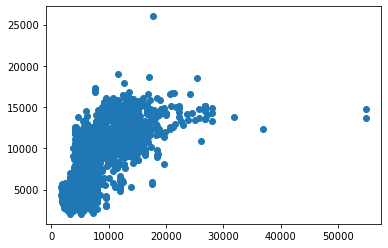

In [81]:
plt.scatter(y_test, predictions)

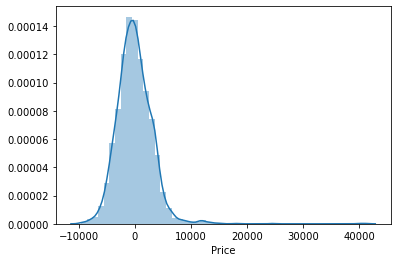

In [82]:
sns.distplot(y_test-predictions)

# Regression Evaluation Metrics

- **MAE** is the easiest to understand, because it's the average error
- **MSE** is more popular than MAE, because MSE 'punishes' larger error,
    which tend to useful in the real world. lesser the error, better the model
- **RMSE** is even more popular then MSE, because RMSE is interpretable in the 'y' units.

- **NOTE** : All of these are **LOSS FUNCTIONS**, because we want to minimize them.

In [83]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2322.7843278949986
MSE: 10076206.678728113
RMSE: 3174.304125115946


In [85]:
metrics.r2_score(y_test, predictions)

0.5025680013856251

# Regression Model Evaluation by "OLS Methods"

In [86]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [87]:
reg_model = smf.OLS(endog=y_train, exog = X_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              3922.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                        0.00
Time:                        22:40:16   Log-Likelihood:                         -71254.
No. Observations:                7478   AIC:                                  1.425e+05
Df Residuals:                    7462   BIC:                                  1.427e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Airline            155.1241     17.192      9.023      0.000     121.423     188.825
Source            -118.8991     42.225     -2.816      0.005    -201.672     -36.126
Destination        350.8751     38.337      9.152      0.000     275.724     426.026
Additional_Info    179.3901     32.669      5.491      0.000     115.350     243.430
Date               -75.4213      4.614    -16.348      0.000     -84.465     -66.377
Month             -323.0880     35.914     -8.996      0.000    -393.490    -252.686
Stop              4809.4813    142.536     33.742      0.000    4530.070    5088.893
Arrival_Hour        -9.9149      5.735     -1.729      0.084     -21.157       1.328
Arrival_Minute      -2.5458      2.459     -1.035      0.301      -7.366       2.274
Departure_Hour      29.4787      6.817      4.324      0.000      16.115      42.843
Departure_Minute    -4.3504      2.083     -2.089      0.037      -8.433      -0.268
Route_1           -412.6003     42.255     -9.764      0.000    -495.433    -329.768
Route_2            -98.8289      5.160    -19.153      0.000    -108.944     -88.714
Route_3            -92.3879      8.751    -10.557      0.000    -109.543     -75.233
Route_4            209.6147     25.164      8.330      0.000     160.286     258.944
Route_5           1551.2119    116.577     13.306      0.000    1322.689    1779.735
==============================================================================
Omnibus:                     6038.700   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           550139.383
Skew:                           3.279   Prob(JB):                         0.00
Kurtosis:                      44.504   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
## R-squared :  0.894
## Adj. R-squared : 0.893

# will try with RANDOM FOREST REGRESSOR

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score

rand_regr = RandomForestRegressor(n_estimators = 400, random_state=0)
rand_regr.fit(X_train, y_train)
random = rand_regr.score(X_test, y_test)

predict_rand = rand_regr.predict(X_test)
exp_rand = explained_variance_score(predict_rand , y_test)

In [90]:
exp_rand

0.8618891328739591

In [104]:
metrics.r2_score(y_test, predict_rand)

0.8721375565559286

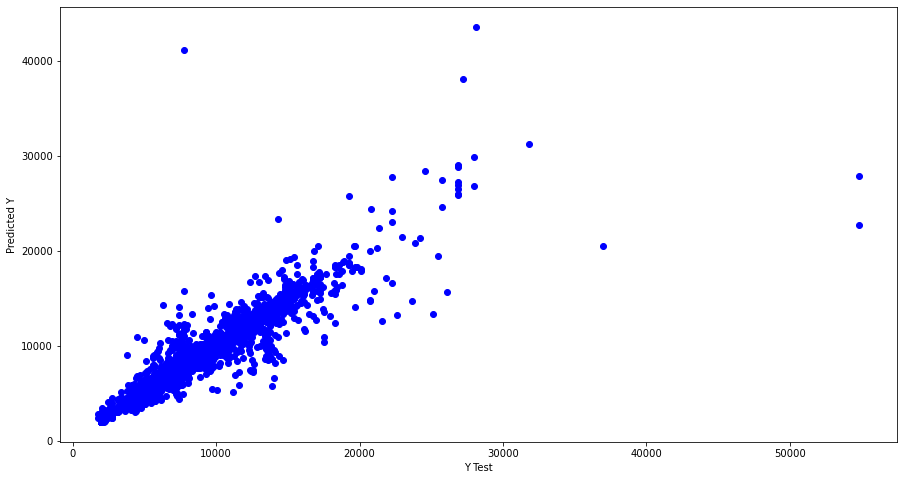

In [91]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predict_rand, c = 'blue')
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

In [92]:
 new = pd.DataFrame(y_test)

In [93]:
new['predict_rand'] = predict_rand

In [94]:
new

,Price,predict_rand
9693,6171.0,6234.2950
9825,3873.0,3882.5425
7702,10991.0,11761.8625
1437,16757.0,18975.4875
6828,6316.0,6049.4875
...,...,...
2294,7318.0,7033.0100
7085,4462.0,4462.7025
10331,11789.0,11695.8000
872,13941.0,14256.8850


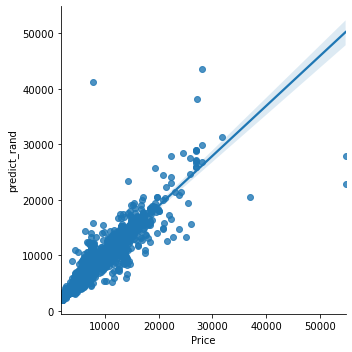

In [95]:
sns.lmplot(x='Price', y='predict_rand', data=new )

# GradientBoostingRegressor

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators = 400, max_depth=5, loss='ls', min_samples_split=2, learning_rate=0.1).fit(X_train, y_train)
gradient = est.score(X_test, y_test)

predict_est = est.predict(X_test)
exp_est = explained_variance_score(predict_est, y_test)

In [99]:
exp_est

0.8589332578087283

In [103]:
metrics.r2_score(y_test, predict_est)

0.8691580046373498

# AdaBoostRegressor

In [100]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.2, loss='exponential').fit(X_train, y_train)
adab = ada.score(X_test, y_test)
predict_ada = ada.predict(X_test)
exp_ada = explained_variance_score(predict_ada, y_test)

In [101]:
exp_ada

0.0775928604065349

In [102]:
metrics.r2_score(y_test, predict_ada)

0.4835613458201078

# Conclusion:

Random Forest Regressor has given good r2_score and explained_variance_score